# Content and Objective

+ Show that frequency response can be generated by stimulating an LTI system with harmonics.
+ It is shown that Fourier transform of the impulse response yields identical results.

# Importing and Plotting Options

In [1]:
# importing
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

# showing figures inline
%matplotlib inline

In [2]:
# plotting options 
font = {'size'   : 20}
plt.rc('font', **font)
plt.rc('text', usetex=True)

matplotlib.rc('figure', figsize=(18, 10) )

# Parameters

In [3]:
# length of impulse response
N = 10

# switch for choosing different impulse responses --> you may add more options if you like to
switch = 1

if switch == 1: 
    h = np.ones(N)

elif switch == 2:
    a = 0.5
    h = a**( - np.arange( 0, N ) )
    
    
# padding zeros    
h = np.hstack( [h, np.zeros_like( h ) ] )

# Getting Frequency Response by Applying FFT

In [4]:
# frequency response by FFT
H_fft = np.fft.fft( np.hstack( [ h, np.zeros( 9 * len( h ) ) ] ) )

# frequency domain out of FFT parameters
delta_Omega = 2 * np.pi / len(H_fft )
Omega = np.arange( -np.pi, np.pi, delta_Omega )

# Getting Frequency Response as Response to Harmonics

In [5]:
# coarse quantiziation of frequency regime for the filterung in order to reduce computational load
N_coarse = 100

delta_Omega_coarse = 2 * np.pi / N_coarse
Omega_coarse = np.arange( -np.pi, np.pi, delta_Omega_coarse )

In [6]:
# getting values of frequency response by filtering
H_response = np.zeros_like( Omega_coarse, dtype = 'complex' )

for ind_Omega, val_Omega in enumerate( Omega_coarse ):

        # length of signal, time vector and IN signal
        N_sig = 500
        n = np.arange( 0, N_sig + 1 )
        x = np.exp( 1j * val_Omega * n )
        
        # OUT signal by convolution
        y = np.convolve( x, h ) 
        
        # frequency response as factor
        # NOTE: since the factor is the same for all times, an arbitrary sample may be chosen
        H_response[ ind_Omega ] = y[ N_sig // 4 ] * x[ N_sig // 4 ].conjugate()

# Plotting

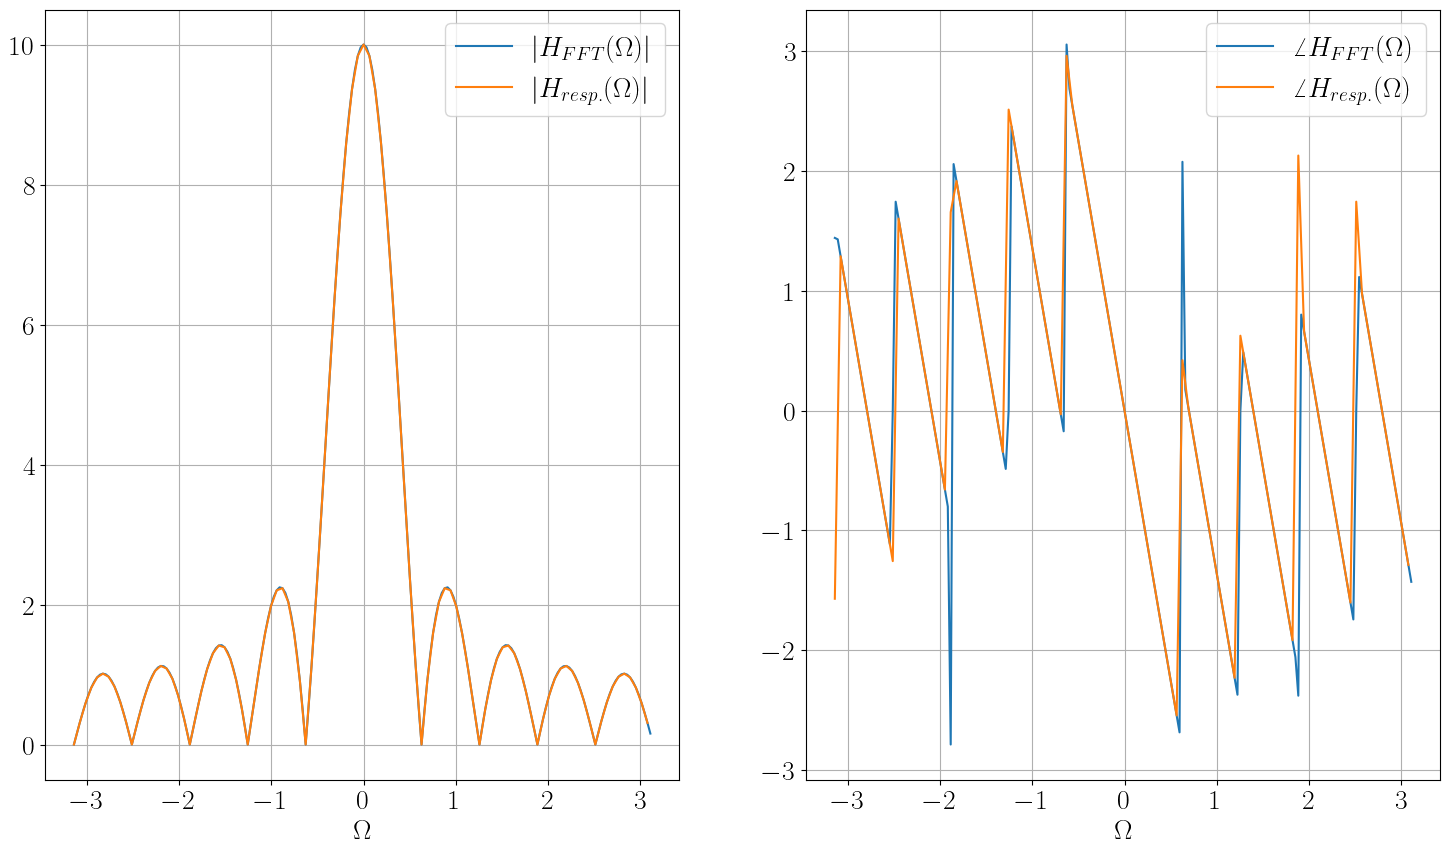

In [9]:
plt.figure()

plt.subplot(121)
plt.plot( Omega, np.abs( np.fft.fftshift( H_fft ) ), label= '$|H_{FFT}(\\Omega)|$' )
plt.plot( Omega_coarse, np.abs( H_response ), label= '$|H_{resp.}(\\Omega)|$')

plt.grid( True )
plt.xlabel('$\\Omega$')
plt.legend( loc='upper right')


plt.subplot(122)
plt.plot( Omega, np.angle( np.fft.fftshift( H_fft ) ), label = '$\\angle H_{FFT}(\\Omega)$' )
plt.plot( Omega_coarse, np.angle( H_response ), label = '$\\angle H_{resp.}(\\Omega)$' )

plt.grid( True )
plt.xlabel('$\\Omega$')
plt.legend( loc='upper right')
plt.show()

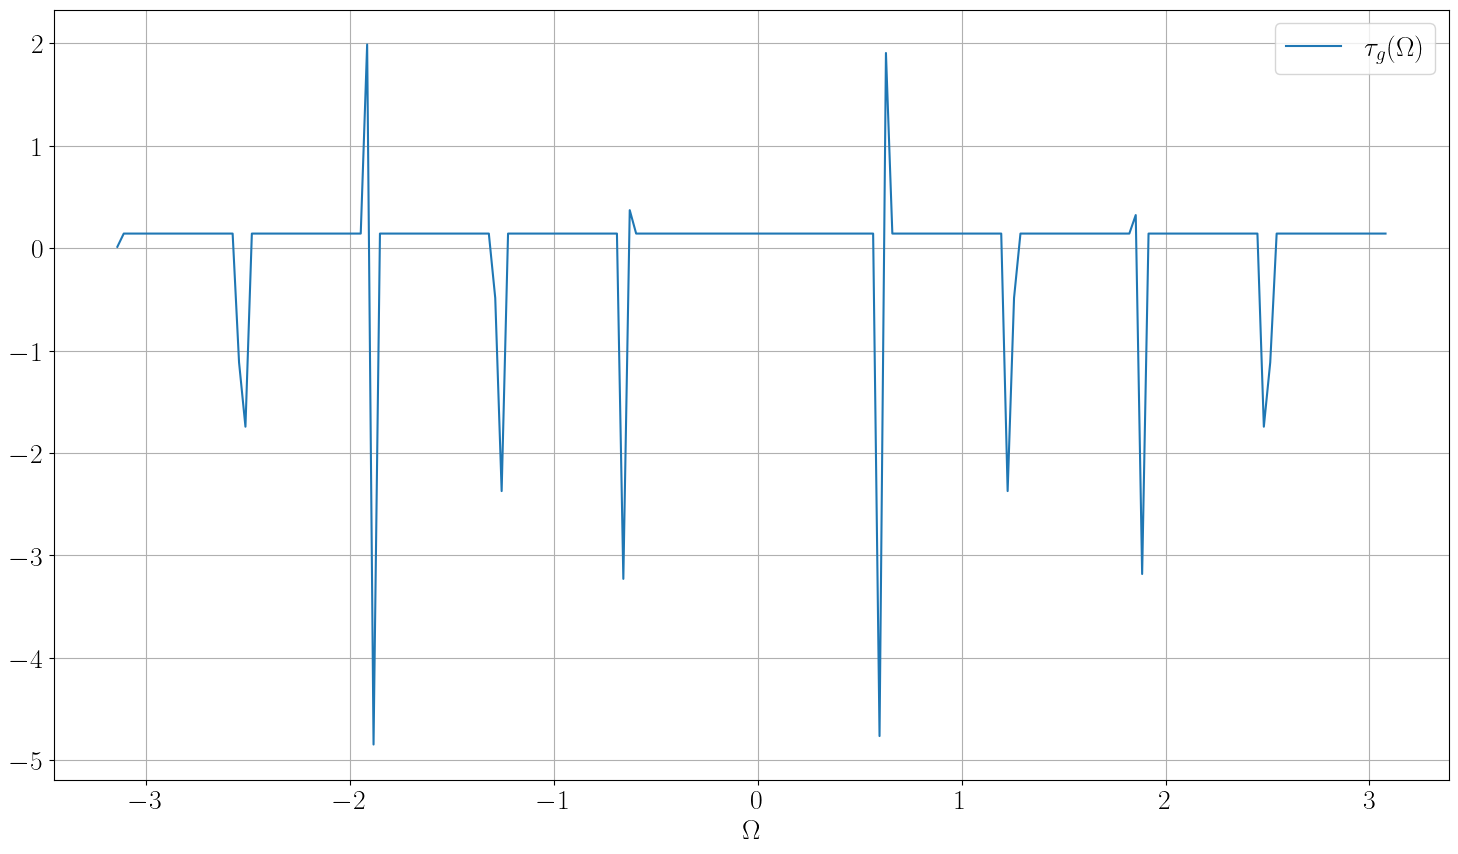

In [8]:
plt.figure()

plt.plot( Omega[:-1], - np.diff( np.angle( np.fft.fftshift( H_fft ) ) ), label = '$\\tau_{g}(\\Omega)$' )

plt.grid( True )
plt.xlabel('$\\Omega$')
plt.legend( loc='upper right')
plt.show()